In [228]:
import torch
import os
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch import nn, optim
import pandas as pd
import numpy as np
from PIL import Image
from time import time
import matplotlib.pyplot as plt

In [242]:
class TrainDatasetFromImages(Dataset):
    def __init__(self, csv_path):
        """
        Args:
            csv_path (string): path to csv file
            img_path (string): path to the folder where images are
            transform: pytorch transforms for transforms and tensor conversion
        """
        # Transforms
        self.to_tensor = transforms.ToTensor()
        # Read the csv file
        self.data_info = pd.read_csv(csv_path, header=None)
        # First column contains the image paths
        self.image_arr = np.asarray(self.data_info.iloc[:, 0])
        # Second column is the labels
        self.label_arr = np.asarray(self.data_info.iloc[:, 1])
        # Calculate len
        self.data_len = len(self.data_info.index)

    def __getitem__(self, index):
        # Get image name from the pandas df
        single_image_name = self.image_arr[index]
        # Open image
        img_as_img = Image.open("data/training/"+single_image_name)

        t = transforms.Resize((20,57))
        
        img_as_img = t(img_as_img)
        
        # Transform image to tensor
        img_as_tensor = self.to_tensor(img_as_img)

        # Get label(class) of the image based on the cropped pandas column
        single_image_label = self.label_arr[index]
        
        single_image_label = torch.tensor([single_image_label], dtype=torch.long)
        
        return (img_as_tensor, single_image_label)

    def __len__(self):
        return self.data_len

#if __name__ == "__main__":
    # Call dataset
#    custom_mnist_from_images =  \
#        CustomDatasetFromImages('data/training')

In [236]:

train_data = TrainDatasetFromImages('data/training/labels-tab-csv.csv')
print(train_data[6][0])
# plt.imshow(train_data[0][0].numpy().squeeze(), cmap='gray_r');
# for index in range(0, 10):
#     plt.imshow(train_data[index][0].numpy().squeeze(), cmap='gray_r');

 # print(train_data[2][0][0][19][56])

# [imageIndex][][][row][column]

rowtotal = 0

# width 1, height = 20 for 20 diff rows
w, h = 1, 20

Matrix = [[0 for x in range(w)] for y in range(h)] 

# Matrix[0][0] = 1

for i in range(0,860):
    for x in range(0,20):
        for z in range(0,57):
            rowtotal += train_data[i][0][0][x][z]
    
corner_avg = rowtotal/(860*20)

# all columns offset by one
# columns
# first = 0.9527
# second = 0.9525
# 3rd = 0.9523
# 4th = 0.9516
# 5th = 0.9501
# 6th = 0.9481
# eleventh = 0.9399

# fourteenth = 0.9359
# sixteenth = 0.9312
# seventeenth = 0.9295
# eighteenth = 0.9293
# nineteenth = 0.9275
# twentieth = 0.9272
# 21st = 0.9268
# 22nd = 0.9260
# 23rd = 0.9241
# 24th = 0.9262
# 25th = 0.9293
# 26th = 0.9324
# 27th = 0.9347
# 28th = 0.9377
# 29th = 0.9410
# 30th = 0.9448
# 31st = 0.9467
# 32nd = 0.9480
# 33rd = 0.9495

# 5 through 33 of 57
# top and bottom 5 for rows of 20

# 5-33 57
# 5-14 20


print(corner_avg)
# figure = plt.figure()
# num_of_images = 60
# for index in range(1, num_of_images + 1):
#     plt.subplot(6, 10, index)
#     plt.axis('off')
#     plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

tensor([[[0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         ...,
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882],
         [0.9882, 0.9882, 0.9882,  ..., 0.9882, 0.9882, 0.9882]]])


KeyboardInterrupt: 

tensor([[1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9882, 0.9922,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9765, 0.7725, 0.7804,
         0.9922, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9961, 0.9294, 0.7216,
         0.9882, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000],
        [1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9961, 0.8784, 0.5922, 0.6667,
         0.9098, 0.9961, 1.0000, 1.0000, 1.0000, 1.0000

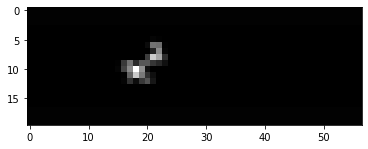

In [324]:
# print(train_data[0])
# print(train_data[0][0][:,5:15,5:33])
plt.imshow(train_data[0][0][:,5:15,5:33].numpy().squeeze(), cmap='gray_r');


myArray = []
for i in range(860):
    myArray.append(train_data[i][0][:,5:15,5:33])
    
    
    
    
# print(train_data.shape)
print(myArray[0][0])

plt.imshow(train_data[0][0].numpy().squeeze(), cmap='gray_r');


In [309]:
arr = np.empty([3,57,20])
print(arr)
print(train_data[0])
# for i in range(860):
#     arr[]


[[[ 0.00000000e+000  1.13635099e-322  0.00000000e+000 ...
    0.00000000e+000  0.00000000e+000  0.00000000e+000]
  [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...
    0.00000000e+000  0.00000000e+000  0.00000000e+000]
  [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...
    0.00000000e+000  0.00000000e+000  0.00000000e+000]
  ...
  [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...
    0.00000000e+000  0.00000000e+000  0.00000000e+000]
  [ 0.00000000e+000  0.00000000e+000  1.65780921e-316 ...
    0.00000000e+000  0.00000000e+000  2.93617426e-294]
  [-1.61999263e-253 -7.15395676e+303  1.65778401e-316 ...
    0.00000000e+000  0.00000000e+000  0.00000000e+000]]

 [[ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...
    0.00000000e+000  0.00000000e+000  4.24399158e-314]
  [ 0.00000000e+000  0.00000000e+000  0.00000000e+000 ...
    4.59089227e+214 -9.44733742e-004  7.29112908e-304]
  [ 7.29112205e-304  1.26480805e-321  0.00000000e+000 ...
    0.00000000e+000  0.0000000

In [308]:
print(arr.size)
# [row][col][value]

4560


In [212]:
train_data2 = train_data[:,5:15, 5:33]
# print(train_data[0])


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [232]:
# width 1, height = 20 for 20 diff rows
w, h = 1, 20

Matrix = [[0 for x in range(w)] for y in range(h)] 

# Matrix[0][0] = 1
print(Matrix[4][0])

train_data = TrainDatasetFromImages('data/training/labels-tab-csv.csv')
# rowtotal = 0

# for i in range(0,860):
#     for x in range(0,20):
#         for z in range(0,57):
#             rowtotal += train_data[i][0][0][x][z]
#         Matrix[x][0] += rowtotal
#         rowtotal = 0
    
# for a in range(0,20):
#     print(Matrix[x][0]/860)

0


In [204]:
for a in range(0,20):
    print(1-Matrix[a][0]/(57*860))

tensor(0.0541)
tensor(0.0534)
tensor(0.0517)
tensor(0.0514)
tensor(0.0486)
tensor(0.0511)
tensor(0.0544)
tensor(0.0576)
tensor(0.0613)
tensor(0.0644)
tensor(0.0657)
tensor(0.0637)
tensor(0.0588)
tensor(0.0538)
tensor(0.0502)
tensor(0.0487)
tensor(0.0522)
tensor(0.0521)
tensor(0.0548)
tensor(0.0541)


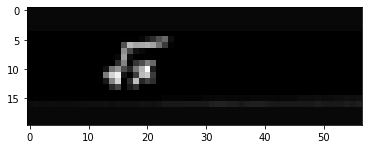

In [186]:
plt.imshow(train_data[1][0].numpy().squeeze(), cmap='gray_r');

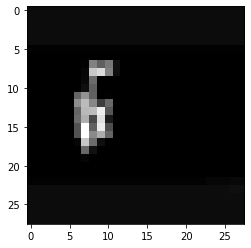

In [183]:
plt.imshow(train_data[2][0].numpy().squeeze(), cmap='gray_r');

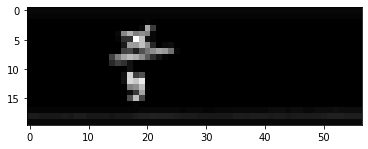

In [95]:
plt.imshow(train_data[3][0].numpy().squeeze(), cmap='gray_r');

In [38]:
input_size = 1140
hidden_sizes = [128, 64]
output_size = 11 #might be an issue

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

torch.Size([1, 20, 57])
torch.Size([1])
torch.Size([1, 1140]) torch.Size([1])
Epoch 0 - Training loss: 2.3071336826612785
Epoch 1 - Training loss: 2.3071011745652488
Epoch 2 - Training loss: 2.3070834841839103
Epoch 3 - Training loss: 2.3070655387501384
Epoch 4 - Training loss: 2.3070479090823683
Epoch 5 - Training loss: 2.3070305322491844
Epoch 6 - Training loss: 2.3070135130438696
Epoch 7 - Training loss: 2.3069967364155968
Epoch 8 - Training loss: 2.3069802749988644
Epoch 9 - Training loss: 2.3069640927536543
Epoch 10 - Training loss: 2.306948155303334
Epoch 11 - Training loss: 2.306932526133781
Epoch 12 - Training loss: 2.3069171179172603
Epoch 13 - Training loss: 2.306901979446411
Epoch 14 - Training loss: 2.306887099909228

Training Time (in minutes) = 0.3918490688006083


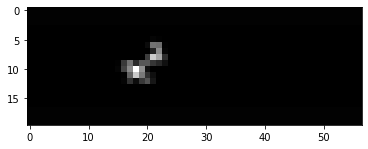

In [53]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_data))

print(images.shape)
print(labels.shape)
images = images.view(images.shape[0], -1)

logps = model(images) 
print(images.shape, labels.shape)


loss = criterion(logps, labels)


optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in train_data:
        images = images.view(images.shape[0], -1)
    
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(train_data)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

In [40]:
valloader = TrainDatasetFromImages('data/training/labels-tab-csv.csv')

correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 1140)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    print(pred_label)
    
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))



4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
